12.878611333440306


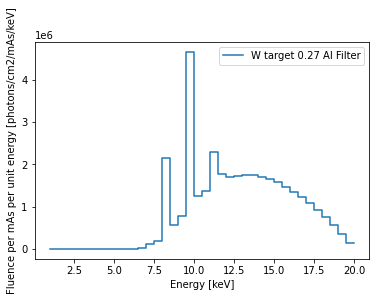

901756367.6915728
19.0222950746233


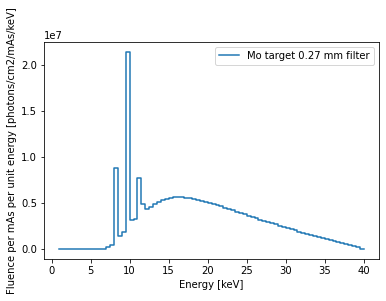

8977722941.869804


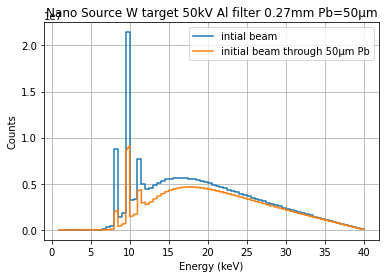

In [1]:

import spekpy as sp
import numpy as np
from matplotlib import pyplot as plt
import xraydb

kv=20

plt.close()


# Generate unfiltered spectrum
s=sp.Spek(kvp=kv,th=43,targ='W')
#s=sp.Spek(kvp=28,th=20,targ='Mo')
# Filter the spectrum
s.filter('Al',0.27)
# Get energy values array and fluence arrays (return values at bin-edges)
karr, spkarr = s.get_spectrum(edges=True)
# Plot spectrum
 
total=np.sum(spkarr)
spkarr_pct=spkarr/total
mean_energy=sum(spkarr_pct*karr)
print(mean_energy)
leg='W target 0.27 Al Filter'
plt.plot(karr, spkarr,label=leg)
plt.xlabel('Energy [keV]')
plt.ylabel('Fluence per mAs per unit energy [photons/cm2/mAs/keV]')
plt.legend()
#plt.axis([0,150,0,2e7])
plt.show()

total=np.sum(np.multiply(karr,spkarr))
print(total)

kv=40

s=sp.Spek(kvp=kv,th=43,targ='W')
#s=sp.Spek(kvp=28,th=20,targ='Mo')
# Filter the spectrum
s.filter('Al',0.27)
# Get energy values array and fluence arrays (return values at bin-edges)
karr, spkarr = s.get_spectrum(edges=True)
# Plot spectrum


 
total=np.sum(spkarr)
spkarr_pct=spkarr/total
mean_energy=sum(spkarr_pct*karr)
print(mean_energy)
leg='Mo target 0.27 mm filter'
plt.plot(karr, spkarr,label=leg)
plt.xlabel('Energy [keV]')
plt.ylabel('Fluence per mAs per unit energy [photons/cm2/mAs/keV]')
plt.legend()
#plt.axis([0,150,0,2e7])
plt.show()

total=np.sum(np.multiply(karr,spkarr))
print(total)


vmin=np.min(karr)*1000
vmax=np.max(karr)*1000
step = (vmax/1000-vmin/1000)/len(karr)*1000
val=np.arange (vmin,vmax,step)
mu=np.zeros(len(val))
trans=np.zeros(len(val))

Thickness=2


cpt=0
for energy in val:
    mu[cpt]=xraydb.material_mu('pmma',energy)
    cpt=cpt+1
    

spkarr_abs1=spkarr*np.exp(-mu*Thickness/10)

plt.figure(3)

plt.plot(karr, spkarr)
plt.plot(karr, spkarr_abs1)
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.legend(['intial beam','initial beam through 50µm Pb'])
plt.title('Nano Source W target 50kV Al filter 0.27mm Pb=50µm')
plt.grid()
plt.show()